# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [ ]:
import requests
u = "https://news.ycombinator.com/"
html = requests.get(u).content.decode('utf-8')
html

'<html lang="en" op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?vZt6RCy7XPbNmjahsSoG">\n        <link rel="shortcut icon" href="favicon.ico">\n          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">\n        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">\n        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>\n                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>\n              <a href="newest">new</a> | <a href="front">past</a> | <

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')
headers = soup.findAll('a', attrs={'class': 'titlelink'})
votes = soup.findAll('span', attrs={'class': "score"})

In [ ]:
#Getting the titles
headers = [h.text.strip() for h in headers]

#Getting the votes
votes = [v.text.strip() for v in votes]

In [ ]:
for (h, v) in zip(headers, votes):
  print(h,v)

Show HN: Warp, a Rust-based terminal for the modern age 60 points
How Neuromancer formed the Cyberpunk Aesthetics 196 points
Show HN: Datagridxl2.js – No-nonsense fast Excel-like data table library 105 points
Switching from pyenv, rbenv, goenv and nvm to asdf 322 points
pnpm: Fast, disk space efficient package manager for JavaScript 78 points
Looking at Zig Programming Language 57 points
Dover.com (YC S19) is hiring senior engineers 285 points
Elon Musk to join Twitter’s board of directors 54 points
Show HN: HomeSheet, easy to use home inventory software 62 points
'Freeze-thaw battery' stores electricity long-term for seasonal release 155 points
My free-software photography workflow 51 points
First Light (Oxford University spinout) achieves nuclear fusion 27 points
35mm cinema film and digital audio 750 points
One App – Two Worlds: This Is TikTok in Russia and Ukraine 67 points
Show HN: Rust test harness that measures energy consumption 96 points
Unreal Engine 5 is now available 27 poi

**Question 2**:  Write a function that collects data on four James Bond movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [ ]:
!pip install tmdbv3api

In [ ]:
from tmdbv3api import TMDb
tmdb = TMDb()
tmdb.api_key = 'eb16f2531a5295585abbcd7732891400'

In [ ]:
tmdb.language = 'en'
tmdb.debug = True

In [ ]:
from tmdbv3api import Movie

movie = Movie()

search = movie.search('James Bond')

for res in search[:4]:
    print("ID: "+ str(res.id))
    print("Title: " + res.title)
    print("Overvie: " + res.overview)
    print("Poster Path: " + res.poster_path)
    print("Vote Average: " + str(res.vote_average))

ID: 869250
Title: Being James Bond
Overvie: Daniel Craig candidly reflects on his 15 year adventure as James Bond. Including never-before-seen archival footage from Casino Royale to the upcoming 25th film No Time To Die, Craig shares his personal memories in conversation with 007 producers, Michael G Wilson and Barbara Broccoli.
Poster Path: /jLaAbwPDzHNbJfZ0Xj0CkeM56CO.jpg
Vote Average: 7.9
ID: 338749
Title: James Bond: For Real
Overvie: The stunts and action set pieces for the the 2006 James Bond adventure 'Casino Royale'.
Poster Path: /vYNYCv3LrZjRvQaFTm5HnZVCIut.jpg
Vote Average: 7.3
ID: 44650
Title: The James Bond Story
Overvie: Bond... James Bond! Perhaps the greatest fictional cinema icon ever. He first appeared on the big screen in 1962 in Dr. No and has remained the most powerful action hero ever since. The secret to his success is his adaptability. No matter what tight spots he finds himself in, he always appears to be suave, sophisticated and cool. This is the full story -- 

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

In [ ]:
!mkdir /root/.kaggle/

In [ ]:
import json
import os

# Installing the Kaggle package
!pip install kaggle

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"","key":""}


# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s kickstarter

ref                                                              title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
datasets/kemical/kickstarter-projects                            Kickstarter Projects                        37MB  2018-02-08 09:02:30          61170       1492  0.7941176        
datasets/socathie/kickstarter-project-statistics                 Kickstarter Project Statistics               1MB  2019-11-14 06:38:31           6331        125  0.7058824        
datasets/codename007/funding-successful-projects                 Funding Successful Projects on Kickstarter  20MB  2017-06-20 17:37:38           3148        115  0.88235295       
datasets/yashkantharia/kickstarter-campaigns                     Kickstarter Campaigns              

In [ ]:
# Creating a dataset directory
!mkdir ./datasets/kickstarter-projects

# download the dataset from Kaggle and unzip it
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter-projects
!unzip ./datasets/kickstarter-projects/kickstarter-projects.zip -d ./datasets/kickstarter-projects/

mkdir: cannot create directory ‘./datasets/kickstarter-projects’: No such file or directory
 43% 16.0M/36.8M [00:00<00:00, 167MB/s]
100% 36.8M/36.8M [00:00<00:00, 230MB/s]
Archive:  ./datasets/kickstarter-projects/kickstarter-projects.zip
  inflating: ./datasets/kickstarter-projects/ks-projects-201612.csv  
  inflating: ./datasets/kickstarter-projects/ks-projects-201801.csv  


In [ ]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("./datasets/kickstarter-projects/ks-projects-201801.csv")
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code
your_id  = "313326985"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 3 and 4


**Question 1:** On average which project category received the lowest number of backers? (15 pt)

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

In [ ]:
from datetime import datetime

df['month'] = df['launched'].apply(lambda x:  datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime("%B"))
df['count'] = df['ID'].apply(lambda x: 1)
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,month,count
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,August,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,September,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,January,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,March,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,July,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,September,1
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,June,1
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,July,1
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,January,1


In [ ]:
g = df[['month', 'count']].groupby('month')
sum_project = g.sum().sort_values(['count'], ascending=1)
sum_project

,count
month,
December,23264
January,27841
February,29732
September,31069
April,32260
August,32291
June,32623
May,32888
November,32890


In [ ]:
month_name = sum_project.index.values[0]
month_name

'December'

In [ ]:
print(month_name +" has the lowest number of projects")

December has the lowest number of projects


**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

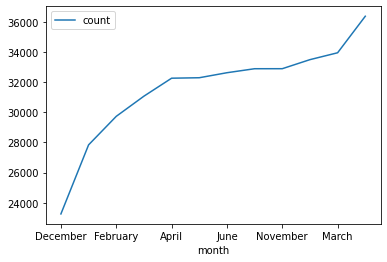

In [ ]:
sum_project.plot(y="count")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


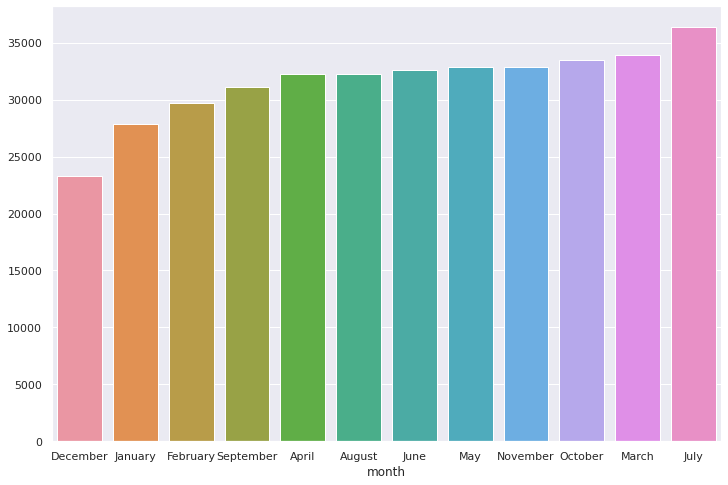

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(12,8)})
sns.barplot(sum_project.index, sum_project['count'].values)

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer the following questions:

In [ ]:
!kaggle datasets list -s marvel

ref                                                                title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/csanhueza/the-marvel-universe-social-network              The Marvel Universe Social Network              3MB  2017-01-28 11:28:49          14960        188  0.9705882        
datasets/leonardopena/marvel-vs-dc                                 Marvel vs DC                                    2KB  2019-12-19 21:58:38           2205         52  1.0              
datasets/dannielr/marvel-superheroes                               Marvel Superheroes                              8MB  2018-07-29 07:50:32           7522         83  0.29411766       
datasets/hchen13/marvel-heroes                                     Marvel H

In [ ]:
# Creating a dataset directory
!mkdir ./datasets/the-marvel-universe-social-network

# download the dataset from Kaggle and unzip it
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/the-marvel-universe-social-network
!unzip ./datasets/the-marvel-universe-social-network/the-marvel-universe-social-network.zip -d ./datasets/the-marvel-universe-social-network/

  0% 0.00/2.72M [00:00<?, ?B/s]
100% 2.72M/2.72M [00:00<00:00, 69.8MB/s]
Archive:  ./datasets/the-marvel-universe-social-network/the-marvel-universe-social-network.zip
  inflating: ./datasets/the-marvel-universe-social-network/edges.csv  
  inflating: ./datasets/the-marvel-universe-social-network/hero-network.csv  
  inflating: ./datasets/the-marvel-universe-social-network/nodes.csv  


In [ ]:
df = pd.read_csv("./datasets/the-marvel-universe-social-network/hero-network.csv")
df = df.drop_duplicates(keep='first')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
6,"STEELE, SIMON/WOLFGA","FORTUNE, DOMINIC"
7,"STEELE, SIMON/WOLFGA","ERWIN, CLYTEMNESTRA"
...,...,...
574395,MAGIK/ILLYANA RASPUT,WASP/JANET VAN DYNE
574399,MAGIK/ILLYANA RASPUT,SCARLET WITCH/WANDA
574401,SCARLET WITCH/WANDA,CALIBAN/
574402,SCARLET WITCH/WANDA,CALLISTO


**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the
    highest number of friends. Please use _hero_network.csv_ file (15pt).
    
**Note:** Not all the links in this dataset are symmetric.

In [ ]:
df_hero1 = df
df_hero2 = df.rename(columns={'hero1':'hero2', 'hero2':'hero1'})
df = pd.concat([df_hero1, df_hero2])
df = df.drop_duplicates(keep='first')
df_friendly = df.groupby('hero1').count().sort_values(['hero2'], ascending = 0).reset_index()
df_friendly = df_friendly.rename(columns={'hero1': 'Name', 'hero2':'Friends'})

df_friendly.head(10)

,Name,Friends
0,CAPTAIN AMERICA,1907
1,SPIDER-MAN/PETER PAR,1737
2,IRON MAN/TONY STARK,1522
3,THING/BENJAMIN J. GR,1416
4,MR. FANTASTIC/REED R,1379
5,WOLVERINE/LOGAN,1371
6,HUMAN TORCH/JOHNNY S,1361
7,SCARLET WITCH/WANDA,1325
8,THOR/DR. DONALD BLAK,1289
9,BEAST/HENRY &HANK& P,1267


In [ ]:
print("The top-10 most friendly characters:")
for hero in df_friendly.Name[:10]:
  print(hero)

The top-10 most friendly characters:
CAPTAIN AMERICA
SPIDER-MAN/PETER PAR
IRON MAN/TONY STARK 
THING/BENJAMIN J. GR
MR. FANTASTIC/REED R
WOLVERINE/LOGAN 
HUMAN TORCH/JOHNNY S
SCARLET WITCH/WANDA 
THOR/DR. DONALD BLAK
BEAST/HENRY &HANK& P


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [ ]:
df_nodes = pd.read_csv("./datasets/the-marvel-universe-social-network/nodes.csv")
df_nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


In [ ]:
df_cd = pd.merge(df_friendly.head(150), df_nodes, how='left', left_on = 'Name', right_on = 'node')
df_cd.fillna('', inplace=True)
del df_cd["node"]
df_cd


In [ ]:
import networkx as nx

fg = nx.Graph()

edges_list = []
for i1, r1 in df_cd.iterrows():
  fg.add_node(r1['Name'], type=r1['type'])
  hero_df = df[df['hero1'] == r1['Name']]
  for i2, r2 in hero_df.iterrows():
    if r2['hero2'] in df_cd.Name.values:
      edges_list.append((r1['Name'], r2['hero2']))

fg.add_edges_from(edges_list)

'Graph with 150 nodes and 8400 edges'

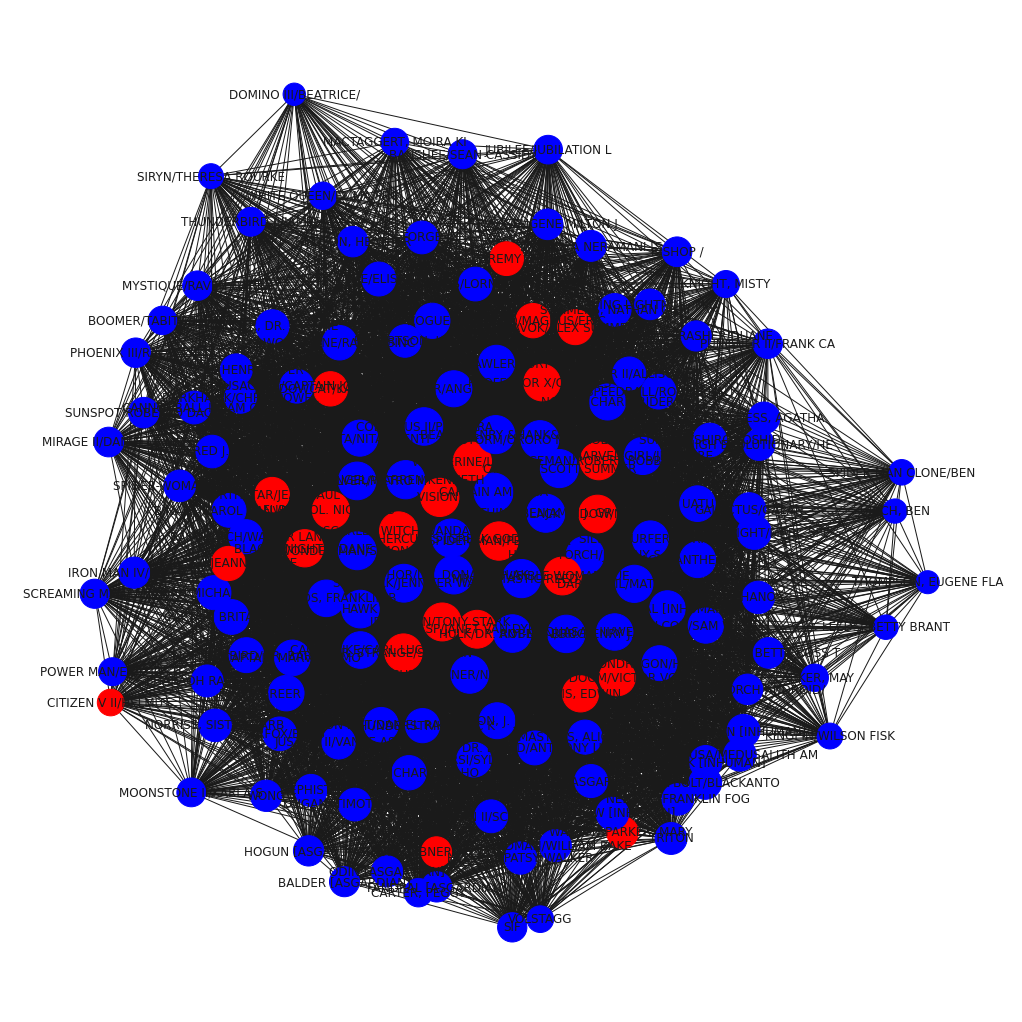

In [ ]:
import matplotlib.pyplot as plt

colors = []
for node in fg.nodes(data=True):
  if node[1]['type'] == "hero":
    colors.append('blue')
  elif node[1]['type'] == "":
    colors.append('red')
  else:
    colors.append('green')

plt.figure(3,figsize=(14,14))
degrees = dict(fg.degree)
nx.draw_kamada_kawai(fg, node_color=colors, node_size=[degree*10 for degree in degrees.values()], with_labels=True)
nx.info(fg)

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)